In [1]:
%%capture
!pip install opendatasets

In [2]:
import opendatasets as od
import pandas as pd

od.download(
    "https://www.kaggle.com/datasets/hijest/genre-classification-dataset-imdb/data"
)

Dataset URL: https://www.kaggle.com/datasets/hijest/genre-classification-dataset-imdb


100%|██████████| 41.7M/41.7M [00:06<00:00, 6.45MB/s]


In [39]:
df_train = pd.read_csv("train_data.txt", delimiter = ':::', names=["title", "genre", "description"])
df_test = pd.read_csv("test_data.txt", delimiter = ':::', names=["title", "description"])

C:\Users\ACER\AppData\Local\Temp\ipykernel_26752\3304676819.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_train = pd.read_csv("train_data.txt", delimiter = ':::', names=["title", "genre", "description"])
C:\Users\ACER\AppData\Local\Temp\ipykernel_26752\3304676819.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_test = pd.read_csv("test_data.txt", delimiter = ':::', names=["title", "description"])


In [5]:
df_train.head(5)

,title,genre,description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [6]:
df_test.head(5)

,title,description
1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
5,Er nu zhai (1955),Before he was known internationally as a mart...


In [7]:
df_train.isna().sum()

title          0
genre          0
description    0
dtype: int64

In [8]:
df_train["genre"].nunique()

27

In [9]:
df_train["genre"].value_counts()

genre
drama           13613
documentary     13096
comedy           7447
short            5073
horror           2204
thriller         1591
action           1315
western          1032
reality-tv        884
family            784
adventure         775
music             731
romance           672
sci-fi            647
adult             590
crime             505
animation         498
sport             432
talk-show         391
fantasy           323
mystery           319
musical           277
biography         265
history           243
game-show         194
news              181
war               132
Name: count, dtype: int64

C:\Users\ACER\AppData\Local\Temp\ipykernel_26752\1789403970.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df_train,


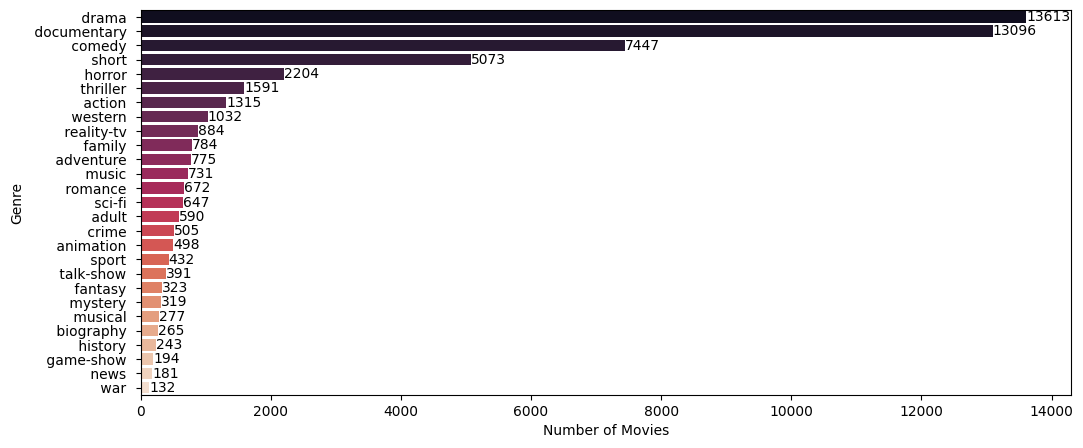

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (12,5))
sns.countplot(data = df_train,
              y="genre",
              order = df_train["genre"].value_counts().index,
              palette = "rocket",
              legend = False)
for i, count in enumerate(df_train['genre'].value_counts()):
    plt.text(count, i, str(count), va='center', ha='left')
plt.xlabel("Number of Movies")
plt.ylabel("Genre")
plt.show()

In [40]:
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = re.sub(r'https\s+', '', text)
    text = re.sub(r'@\s+', '', text)
    text = re.sub(r'#\s+', '', text)
    text = re.sub(r'\s+', ' ', text)
    return text

df_train['description'] = df_train['description'].apply(clean_text)
df_test['description'] = df_test['description'].apply(clean_text)

In [41]:
df_train

,title,genre,description
1,Oscar et la dame rose (2009),drama,listening in to a conversation between his do...
2,Cupid (1997),thriller,a brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,as the bus empties the students for their fie...
4,The Secret Sin (1915),drama,to help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,the films title refers not only to the unreco...
...,...,...,...
54210,"""Bonino"" (1953)",comedy,this shortlived nbc live sitcom centered on b...
54211,Dead Girls Don't Cry (????),horror,the next generation of exploitation the siste...
54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,ze bestaan echt is a standup comedy about gro...
54213,Make Your Own Bed (1944),comedy,walter and vivian live in the country and hav...


In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=300)

# Fit and transform the description column
tfidf_train_embeddings = tfidf_vectorizer.fit_transform(df_train['description'])
tfidf_test_embeddings = tfidf_vectorizer.transform(df_test['description'])

# Convert the embeddings to DataFrame for better readability
df_train_tfidf = pd.DataFrame(tfidf_train_embeddings.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
df_test_tfidf = pd.DataFrame(tfidf_test_embeddings.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

df_train_tfidf.head()

,about,across,after,again,against,all,along,also,always,american,...,work,working,world,would,year,years,york,you,young,your
0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.092125,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.067396,0.113849,0.140319,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.091132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.132582,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
print(df_train_tfidf.shape)

(54214, 300)


In [44]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

# Encode the target labels
le = LabelEncoder()
y_train = le.fit_transform(df_train['genre'])

# Initialize the Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()

# Train the classifier
nb_classifier.fit(tfidf_train_embeddings, y_train)

# Predict on the training set
y_train_pred = nb_classifier.predict(tfidf_train_embeddings)

# Evaluate the classifier
accuracy = accuracy_score(y_train, y_train_pred)
report = classification_report(y_train, y_train_pred, target_names=le.classes_)

print(f"Training Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")

Training Accuracy: 0.43140148301176817
Classification Report:
               precision    recall  f1-score   support

      action        0.00      0.00      0.00      1315
       adult        0.00      0.00      0.00       590
   adventure        0.00      0.00      0.00       775
   animation        0.00      0.00      0.00       498
   biography        0.00      0.00      0.00       265
      comedy        0.44      0.09      0.15      7447
       crime        0.00      0.00      0.00       505
 documentary        0.49      0.88      0.63     13096
       drama        0.38      0.82      0.52     13613
      family        0.00      0.00      0.00       784
     fantasy        0.00      0.00      0.00       323
   game-show        1.00      0.02      0.03       194
     history        0.00      0.00      0.00       243
      horror        1.00      0.00      0.00      2204
       music        1.00      0.00      0.00       731
     musical        0.00      0.00      0.00       277
  

c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [46]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(tfidf_train_embeddings, y_train)

# Predict on the training set
y_train_pred_rf = rf_classifier.predict(tfidf_train_embeddings)

# Evaluate the classifier
accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
report_rf = classification_report(y_train, y_train_pred_rf, target_names=le.classes_)

print(f"Training Accuracy with Random Forest: {accuracy_rf}")
print(f"Classification Report with Random Forest:\n{report_rf}")

Training Accuracy with Random Forest: 0.9973807503596857
Classification Report with Random Forest:
               precision    recall  f1-score   support

      action        1.00      1.00      1.00      1315
       adult        1.00      1.00      1.00       590
   adventure        1.00      0.99      1.00       775
   animation        1.00      1.00      1.00       498
   biography        1.00      1.00      1.00       265
      comedy        0.99      1.00      0.99      7447
       crime        1.00      1.00      1.00       505
 documentary        1.00      1.00      1.00     13096
       drama        1.00      1.00      1.00     13613
      family        0.99      0.99      0.99       784
     fantasy        0.99      1.00      1.00       323
   game-show        1.00      1.00      1.00       194
     history        1.00      1.00      1.00       243
      horror        1.00      1.00      1.00      2204
       music        1.00      1.00      1.00       731
     musical        

In [ ]:
# Predict on the test set using the Naive Bayes classifier
y_test_pred_nb = nb_classifier.predict(tfidf_test_embeddings)

# Predict on the test set using the Random Forest classifier
y_test_pred_rf = rf_classifier.predict(tfidf_test_embeddings)

# Decode the predicted labels back to their original genre names
y_test_pred_nb_labels = le.inverse_transform(y_test_pred_nb)
y_test_pred_rf_labels = le.inverse_transform(y_test_pred_rf)

# Add the predictions to the test dataframe
df_test['predicted_genre_nb'] = y_test_pred_nb_labels
df_test['predicted_genre_rf'] = y_test_pred_rf_labels

,title,description,predicted_genre_nb,predicted_genre_rf
1,Edgar's Lunch (1998),lr brane loves his life his car his apartment...,drama,drama
2,La guerra de papá (1977),spain march 1964 quico is a very naughty chil...,drama,drama
3,Off the Beaten Track (2010),one year in the life of albin and his family ...,documentary,documentary
4,Meu Amigo Hindu (2015),his father has died he hasnt spoken with his ...,drama,drama
5,Er nu zhai (1955),before he was known internationally as a mart...,drama,documentary
...,...,...,...,...
96,"""Showcase"" (2015)",jason thompson presents a selection of some o...,documentary,documentary
97,"Cinderelas, Lobos e Um Príncipe Encantado (20...",around 900 thousand people are trafficked a y...,drama,documentary
98,It's All in Your Mind (1938),wilbur crane is a meek mildmannered bookkeepe...,drama,drama
99,The Ouija Experiment 2: Theatre of Death (2015),a fun filled weekend turns deadly when a grou...,drama,comedy


In [50]:
df_test.to_csv("test_data_with_predictions.csv", index=False)